# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#Define the URL
url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

target_url=url+"appid="+api_key+"&units="+units+"&q="


weather_json=requests.get(target_url+cities[0]).json()

#Pretty print the JSON
print(json.dumps(weather_json,indent=4,sort_keys=True))

{
    "cod": "404",
    "message": "city not found"
}


In [4]:
#Retrieving elements
city_name=[]
country=[]
date=[]
latitude=[]
longitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#Define counter for printing the record number and set number
record_counter=0
set_counter=1

print("Beginning Data Retrieval\n")
print("---------------------------------------------------------------\n")

for c in cities:
    try:
        
        city_response=requests.get(target_url+c).json()
        city_name.append(city_response["name"])
        country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
        latitude.append(city_response["coord"]["lat"])
        longitude.append(city_response["coord"]["lon"])
        temperature.append(city_response["main"]["temp_max"])
        humidity.append(city_response["main"]["humidity"])
        cloudiness.append(city_response["clouds"]["all"])
        wind_speed.append(city_response["wind"]["speed"])
        print(f"Processing Record {record_counter} of Set {set_counter} | {c}")
        record_counter=record_counter+1
        print(f"{target_url+c}")
        if(record_counter==50):
            record_counter=0
            set_counter=set_counter+1
    except:
        print(f"City '{c}' not found. Skipping...")

print("---------------------------------------------------------------\n")        
print("Data Retrieval Complete\n")
print("---------------------------------------------------------------")

Beginning Data Retrieval

---------------------------------------------------------------

City 'attawapiskat' not found. Skipping...
City 'belushya guba' not found. Skipping...
City 'halalo' not found. Skipping...
City 'bantry' not found. Skipping...
City 'barentsburg' not found. Skipping...
Processing Record 0 of Set 1 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=iqaluit
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ushuaia
Processing Record 2 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=mataura
Processing Record 3 of Set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=sao filipe
City 'doctor pedro p. pena' not found. Skipping...
Processing Record 4 of Set 1 | arman
http://api.o

Processing Record 0 of Set 2 | pingxiang
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=pingxiang
Processing Record 1 of Set 2 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bandarbeyla
Processing Record 2 of Set 2 | airai
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=airai
Processing Record 3 of Set 2 | ligayan
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ligayan
Processing Record 4 of Set 2 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=provideniya
Processing Record 5 of Set 2 | hami
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=hami
Processing Record 6 of Set 2 | ribeira brava
http://api.openweathermap.org/data/2.5/weathe

Processing Record 2 of Set 3 | ginir
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ginir
Processing Record 3 of Set 3 | mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=mabaruma
Processing Record 4 of Set 3 | puri
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=puri
City 'naral' not found. Skipping...
Processing Record 5 of Set 3 | khasan
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=khasan
Processing Record 6 of Set 3 | yarmouth
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=yarmouth
Processing Record 7 of Set 3 | noumea
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=noumea
Processing Record 8 of Set 3 | vanavara
http://api.openweathermap.org/data

Processing Record 4 of Set 4 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=marawi
Processing Record 5 of Set 4 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=san patricio
Processing Record 6 of Set 4 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=klaksvik
Processing Record 7 of Set 4 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=adrar
Processing Record 8 of Set 4 | aginskoye
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=aginskoye
Processing Record 9 of Set 4 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=thompson
Processing Record 10 of Set 4 | charters towers
http://api.openweathermap.org/data/2.5/w

Processing Record 8 of Set 5 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=namatanai
Processing Record 9 of Set 5 | koshurnikovo
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=koshurnikovo
Processing Record 10 of Set 5 | boa vista
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=boa vista
Processing Record 11 of Set 5 | dubrovnik
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=dubrovnik
Processing Record 12 of Set 5 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=saint-pierre
Processing Record 13 of Set 5 | ballina
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ballina
Processing Record 14 of Set 5 | khatanga
http://api.openweatherm

Processing Record 10 of Set 6 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=port hardy
Processing Record 11 of Set 6 | clarksburg
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=clarksburg
Processing Record 12 of Set 6 | kyshtovka
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kyshtovka
Processing Record 13 of Set 6 | gushikawa
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=gushikawa
Processing Record 14 of Set 6 | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tiarei
Processing Record 15 of Set 6 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=mahebourg
Processing Record 16 of Set 6 | saint george
http://api.openweathermap.o

Processing Record 12 of Set 7 | ust-kulom
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ust-kulom
Processing Record 13 of Set 7 | abu zabad
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=abu zabad
Processing Record 14 of Set 7 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=alta floresta
Processing Record 15 of Set 7 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=hervey bay
Processing Record 16 of Set 7 | debre tabor
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=debre tabor
Processing Record 17 of Set 7 | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=paamiut
Processing Record 18 of Set 7 | hovd
http://api.openweatherm

Processing Record 15 of Set 8 | kostino
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kostino
Processing Record 16 of Set 8 | tamandare
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tamandare
Processing Record 17 of Set 8 | tashla
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tashla
Processing Record 18 of Set 8 | finschhafen
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=finschhafen
Processing Record 19 of Set 8 | alekseyevka
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=alekseyevka
Processing Record 20 of Set 8 | ozinki
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=ozinki
Processing Record 21 of Set 8 | tucurui
http://api.openweathermap.org/data/2.5

City 'shchelyayur' not found. Skipping...
Processing Record 17 of Set 9 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tuatapere
City 'sentyabrskiy' not found. Skipping...
Processing Record 18 of Set 9 | abha
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=abha
Processing Record 19 of Set 9 | lugovoy
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lugovoy
Processing Record 20 of Set 9 | eureka
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=eureka
Processing Record 21 of Set 9 | alenquer
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=alenquer
Processing Record 22 of Set 9 | burnie
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=burnie
Processing Re

Processing Record 19 of Set 10 | farafangana
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=farafangana
Processing Record 20 of Set 10 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=kalmunai
Processing Record 21 of Set 10 | guiratinga
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=guiratinga
Processing Record 22 of Set 10 | bud
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=bud
Processing Record 23 of Set 10 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=tezu
City 'ngama' not found. Skipping...
Processing Record 24 of Set 10 | cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=cockburn town
Processing Record 25 of Set 10 | takht

Processing Record 21 of Set 11 | lumphat
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=lumphat
Processing Record 22 of Set 11 | zumarraga
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=zumarraga
Processing Record 23 of Set 11 | roald
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=roald
Processing Record 24 of Set 11 | norrtalje
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=norrtalje
Processing Record 25 of Set 11 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=faanui
Processing Record 26 of Set 11 | sistranda
http://api.openweathermap.org/data/2.5/weather?appid=8a59dc297a1f65f52820fba1e8269100&units=imperial&q=sistranda
Processing Record 27 of Set 11 | chenzhou
http://api.openweathermap.org/data/2.5/w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert the data to DataFrame
city_weather_df=pd.DataFrame({"City":city_name,
                              "Country":country,
                              "Date":date,
                             "Latitude":latitude,
                             "Longitude":longitude,
                             "Temperature":temperature,
                             "Humidity":humidity,
                             "Cloudiness":cloudiness,
                             "Wind_speed":wind_speed})

#Convert date from unix format
city_weather_df["Date"]=pd.to_datetime(city_weather_df["Date"],unit='s')

#Display the DataFrame
city_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_speed
0,Iqaluit,CA,2019-10-24 16:13:49,63.75,-68.52,33.80,97,90,18.34
1,Ushuaia,AR,2019-10-24 16:12:27,-54.81,-68.31,50.00,66,75,12.75
2,Mataura,NZ,2019-10-24 16:12:26,-46.19,168.86,45.00,83,93,14.00
3,Sao Filipe,CV,2019-10-24 16:12:27,14.90,-24.50,75.02,78,0,17.87
4,Arman,RU,2019-10-24 16:21:53,59.70,150.17,30.24,57,98,4.81


In [6]:
#Verify counts
city_weather_df.count()

City           546
Country        546
Date           546
Latitude       546
Longitude      546
Temperature    546
Humidity       546
Cloudiness     546
Wind_speed     546
dtype: int64

In [7]:
#Retrieve the current date for plotting the graphs
current_date_list=(city_weather_df["Date"].dt.strftime('%m/%d/%y')).unique()
current_date=current_date_list[0]
current_date

'10/24/19'

In [8]:
#Export the city data into a .csv.
city_weather_df.to_csv("../city_weather.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

//anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


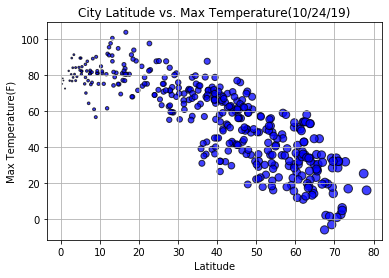

In [9]:
# Plot Latitude vs.Temperature (Scatter Plot)
plt.scatter(city_weather_df["Latitude"],city_weather_df["Temperature"],marker="o",facecolors="blue",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")


#Set the title
plt.title(f"City Latitude vs. Max Temperature({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Temperature.png")

#Show the plot
plt.show()

#### Latitude vs. Humidity Plot

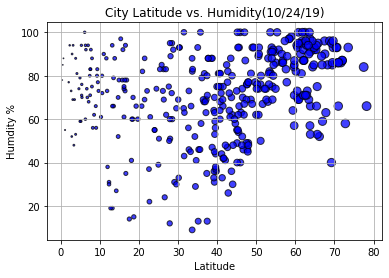

In [10]:
# Plot Latitude vs. Humidity

plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"],marker="o",facecolors="blue",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Humdity %")

#Set the title
plt.title(f"City Latitude vs. Humidity({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Humidity.png")

#Show the plot
plt.show()

#### Latitude vs. Cloudiness Plot

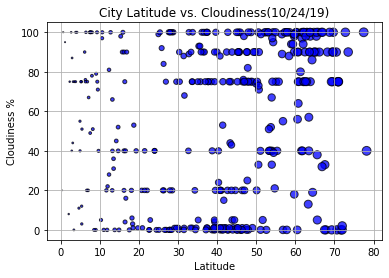

In [11]:
# Plot Latitude vs. Cloudiness
plt.scatter(city_weather_df["Latitude"],city_weather_df["Cloudiness"],marker="o",facecolors="blue",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

#Set the title
plt.title(f"City Latitude vs. Cloudiness({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Cloudiness.png")

#Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

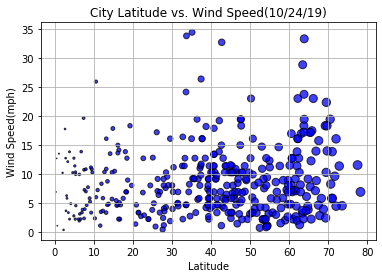

In [12]:
# Plot Latitude vs. Wind Speed
plt.scatter(city_weather_df["Latitude"],city_weather_df["Wind_speed"],marker="o",facecolors="blue",edgecolors="black",s=latitude,alpha=0.75)

# Set the labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

#Set the title
plt.title(f"City Latitude vs. Wind Speed({current_date})")

#Set the grids
plt.grid()

#Save the plot
plt.savefig("../Latitude_vs_Wind_Speed.png")

#Show the plot
plt.show()

# Observations

1. Latitude vs. Temperature: 
    (a) The distance from Equator affects the temperature.
    (b) If the city is farther away, the temperature is colder.
    (c) If the city is closer to the equator, the temperature is warmer.

2. Latitude vs. Humidity: 
    (a) Needs additional analysis, may be addition of Temperature as a parameter can help us derive better observations.
    
3. Latitude vs. Cloudiness:
    (a) Needs additional analysis, no observation can be made with the available information.
    
4. Latitude vs. Wind Speed: 
    (a)Windspeeds seem to be high at latitudes furthest from the equator.